Dataset de Producciones de Teatro Musical en España (2011–2025) (Maestro)

Este dataset es propio y ha sido diseñado y construido manualmente a partir del conocimiento del sector del teatro musical en España, combinando información procedente de fuentes públicas y oficiales, como páginas web de productoras y teatros, carteleras históricas, notas de prensa y comunicación institucional.

El objetivo del dataset es modelizar una muestra representativa de las producciones de teatro musical estrenadas en España entre 2011 y 2025, con un enfoque analítico orientado a identificar patrones de producción, dinámicas por productora, evolución temporal de los estrenos, duración de las producciones y presencia de giras.

Este dataset no pretende ser un censo exhaustivo del sector, sino una muestra curada, coherente y analíticamente consistente, estructurada para facilitar análisis exploratorios (EDA), visualizaciones y la construcción de dashboards descriptivos. Incluye variables clave como obra, productora, teatro de estreno, año de inicio y fin, duración y realización de gira.

In [22]:
import pandas as pd          # Manejo y análisis de datos en tablas (DataFrames)
from IPython.display import display  # Muestra objetos de forma clara en notebooks
import matplotlib.pyplot as plt      # Crear gráficos y visualizaciones
import seaborn as sns        # Gráficos estadísticos atractivos (basado en matplotlib)
from matplotlib.lines import Line2D  # Crear o personalizar líneas en gráficos
import numpy as np
from IPython.display import display, Markdown


SHAPE (filas, columnas): (71, 10)


,obra,productora,anio_inicio,anio_fin,teatro,gira,activa,duracion,genero,origen
0,"101 Dálmatas, el musical",Teatropolis (Gran Teatro CaixaBank Príncipe Pío),2023,NaN,Gran Teatro CaixaBank Príncipe Pío,No,True,90,Comedia,Creacion Propia
1,Aladdín,Stage Entertainment,2023,2025.0,Teatro Coliseum,No,False,145,Familiar,Franquicia
2,Anastasia,Stage Entertainment,2018,2020.0,Teatro Coliseum,No,False,95,Familiar,Franquicia
3,Annie,Theatre Properties,2010,2011.0,Nuevo Alcalá,No,False,120,Familiar,Franquicia
4,Avenue Q,SMedia,2010,2011.0,Nuevo Apolo,No,False,135,Comedia,Franquicia



FOTO EJECUTIVA DEL DATASET
Total de producciones: 71
Total de obras únicas: 66
Rango temporal: 2010 - 2025

INFO DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obra         71 non-null     object 
 1   productora   71 non-null     object 
 2   anio_inicio  71 non-null     int64  
 3   anio_fin     58 non-null     float64
 4   teatro       71 non-null     object 
 5   gira         71 non-null     object 
 6   activa       71 non-null     bool   
 7   duracion     71 non-null     int64  
 8   genero       71 non-null     object 
 9   origen       71 non-null     object 
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 5.2+ KB

NULOS POR COLUMNA


,nulos_abs,nulos_pct
anio_fin,13,18.3
obra,0,0.0
productora,0,0.0
anio_inicio,0,0.0
teatro,0,0.0
gira,0,0.0
activa,0,0.0
duracion,0,0.0
genero,0,0.0
origen,0,0.0



FILAS DUPLICADAS SEGÚN CLAVE DE NEGOCIO: 0

DESCRIBE (variables numéricas)


,anio_inicio,anio_fin,duracion
count,71.000000,58.000000,71.000000
mean,2018.901408,2020.155172,138.535211
std,4.934297,4.712066,26.135816
min,2010.000000,2011.000000,70.000000
25%,2014.500000,2015.250000,125.000000
50%,2021.000000,2023.000000,150.000000
75%,2023.000000,2024.000000,150.000000
max,2025.000000,2025.000000,180.000000


'## Foto ejecutiva'

,Total producciones,Total obras únicas,% en gira (Sí),% activas (Sí),Duración media (min)
0,71,66,57.7,18.3,138.5


## 1) ¿Qué géneros dominan la programación de musicales en España (2011–2025)?

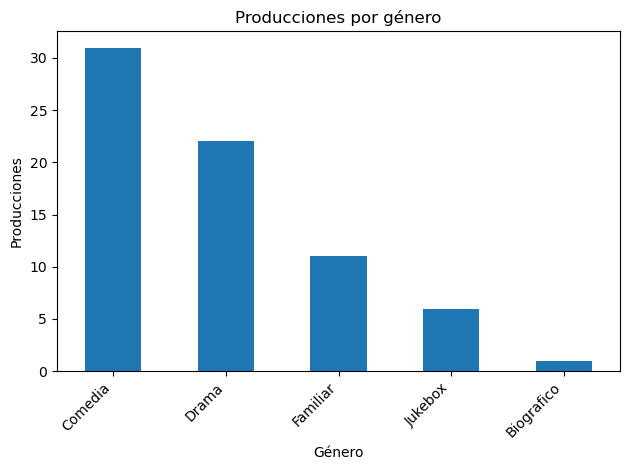

**Insight:** El género con mayor peso es **Comedia**; esto marca el tono dominante de la oferta y es un buen proxy de demanda del público.

## 2) ¿Qué pesa más en el mercado: franquicias o creación propia?

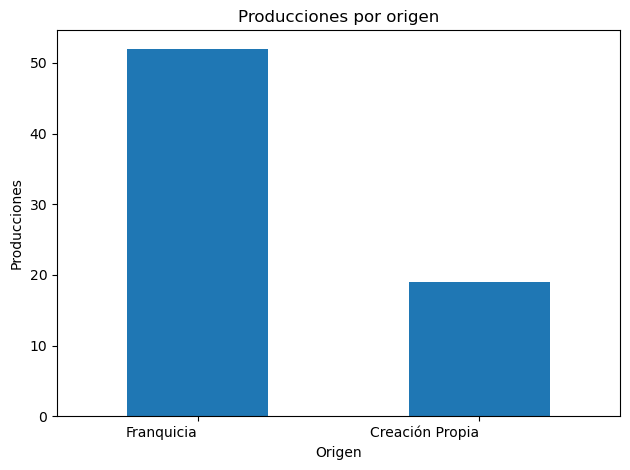

**Insight:** Predomina **Franquicia**. Lectura negocio: equilibrio entre *seguridad comercial* (franquicias) y *diferenciación* (creación propia).

## 3) ¿Qué géneros dependen más de franquicia y cuáles impulsan creación propia?

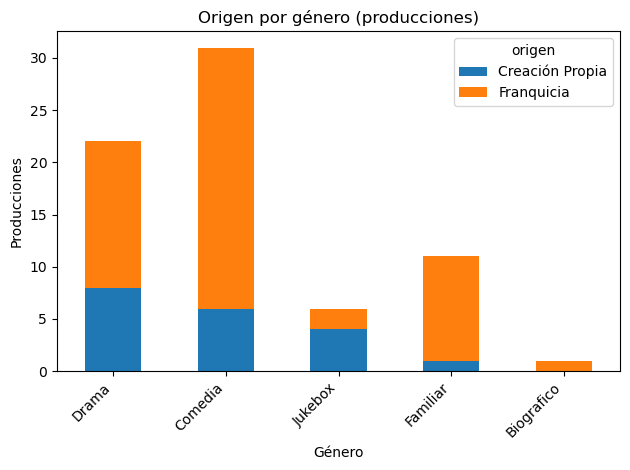

**Insight:** Este cruce identifica *dónde hay innovación* (más creación propia) y *dónde se compra IP* (más franquicia). Útil para estrategia de programación.

## 4) ¿Qué géneros tienden a ser más largos (y por tanto más exigentes en operación y experiencia)?

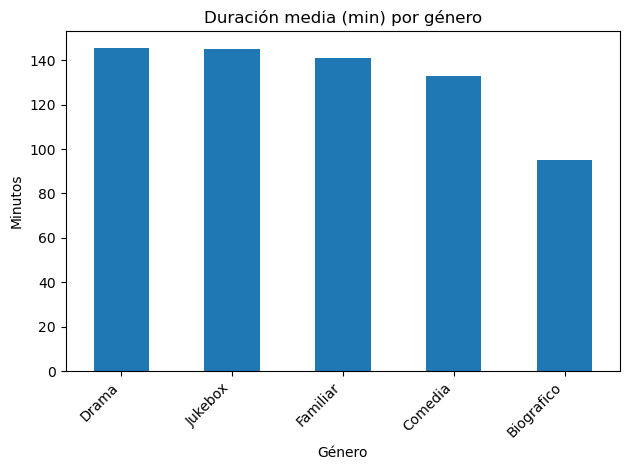

**Insight:** La duración media varía por género; esto impacta en *rotación de público*, *coste operativo* y *diseño de experiencia*.

## 5) ¿Cómo evoluciona la oferta a lo largo del tiempo y cuándo crece la franquicia vs creación propia?

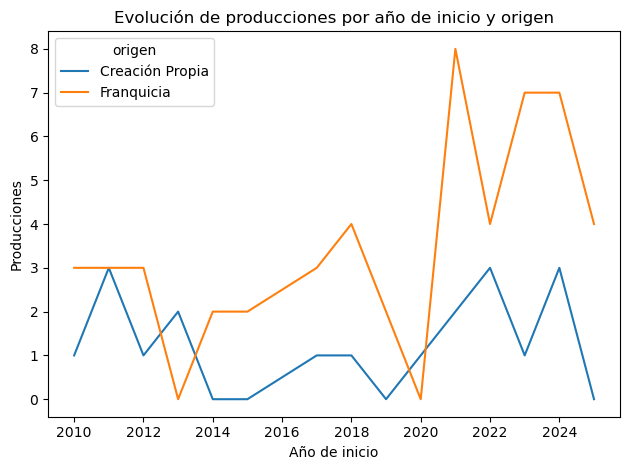

**Insight:** La serie temporal permite leer ciclos del mercado y cambios de apuesta (más franquicia vs más creación propia) según contexto y demanda.

## 6) ¿Qué productoras concentran más producciones y cuál es su mix (franquicia vs creación propia)?

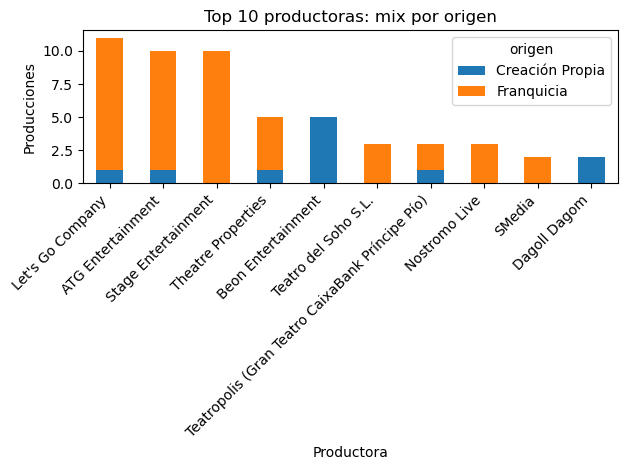

**Insight:** Aquí se ve quién compite por *escala* y quién por *propuesta* (innovación/creación). Es un mapa rápido del posicionamiento del sector.

In [23]:
# 0) CARGA
# -------------------------
df_maestro = pd.read_csv("../Data/maestro_musicales.csv", encoding="utf-8")


# 1. HEAD + SHAPE
# -------------------------
print("SHAPE (filas, columnas):", df_maestro.shape)
display(df_maestro.head())

# -------------------------
# 2. FOTO EJECUTIVA
# -------------------------
print("\nFOTO EJECUTIVA DEL DATASET")
print("Total de producciones:", df_maestro.shape[0])
print("Total de obras únicas:", df_maestro["obra"].nunique())
print(
    "Rango temporal:",
    f"{int(df_maestro['anio_inicio'].min())} - {int(df_maestro['anio_fin'].max())}"
    if df_maestro["anio_fin"].notna().any()
    else f"{int(df_maestro['anio_inicio'].min())} - Actualidad"
)

# -------------------------
# 3. ESTRUCTURA Y TIPOS
# -------------------------
print("\nINFO DEL DATASET")
df_maestro.info()

# -------------------------
# 4. NULOS (conteo y %)
# -------------------------
print("\nNULOS POR COLUMNA")
nulos_abs = df_maestro.isna().sum()
nulos_pct = (df_maestro.isna().mean() * 100).round(1)

df_nulos = pd.DataFrame({
    "nulos_abs": nulos_abs,
    "nulos_pct": nulos_pct
}).sort_values("nulos_abs", ascending=False)

display(df_nulos)

# -------------------------
# 5. DUPLICADOS (clave de negocio)
# Clave: obra + productora + anio_inicio + teatro
# -------------------------
clave_negocio = ["obra", "productora", "anio_inicio", "teatro"]

duplicados = df_maestro.duplicated(subset=clave_negocio, keep=False)
print("\nFILAS DUPLICADAS SEGÚN CLAVE DE NEGOCIO:", duplicados.sum())

if duplicados.sum() > 0:
    display(
        df_maestro.loc[duplicados, clave_negocio]
        .sort_values(clave_negocio)
    )

# -------------------------
# 6. DESCRIBE (solo numéricas)
# -------------------------
print("\nDESCRIBE (variables numéricas)")
display(df_maestro.describe())
# -------------------------


# 1) NORMALIZACIÓN (tipos + texto)
# -------------------------
# Texto base
for c in ["obra", "productora", "teatro", "genero", "origen"]:
    if c in df_maestro.columns:
        df_maestro[c] = df_maestro[c].astype("string").str.strip()

# Normaliza "gira" a Sí/No
if "gira" in df_maestro.columns:
    df_maestro["gira"] = (
        df_maestro["gira"]
        .astype("string")
        .str.strip()
        .str.lower()
        .replace({"si":"Sí", "sí":"Sí", "s":"Sí", "no":"No", "n":"No", "nan": pd.NA})
    )

# Normaliza "activa" a Sí/No (soporta True/False y textos)
if "activa" in df_maestro.columns:
    df_maestro["activa"] = (
        df_maestro["activa"]
        .replace({True:"Sí", False:"No"})
        .astype("string")
        .str.strip()
        .str.lower()
        .replace({"true":"Sí","false":"No","si":"Sí","sí":"Sí","no":"No","nan": pd.NA})
    )

# Numéricos: evita el ".0" usando Int64 (admite NA)
for c in ["anio_inicio", "anio_fin", "duracion"]:
    if c in df_maestro.columns:
        df_maestro[c] = pd.to_numeric(df_maestro[c], errors="coerce").astype("Int64")

# Title Case en género y origen (primera letra en mayúsculas)
# (mantiene tildes y capitaliza por palabra)
if "genero" in df_maestro.columns:
    df_maestro["genero"] = df_maestro["genero"].astype("string").str.strip().str.title()

if "origen" in df_maestro.columns:
    df_maestro["origen"] = df_maestro["origen"].astype("string").str.strip().str.title()

# Tip: homogeniza valores típicos en origen si hace falta
if "origen" in df_maestro.columns:
    df_maestro["origen"] = df_maestro["origen"].replace({
        "Creacion Propia":"Creación Propia",
        "Creación propia":"Creación Propia",
        "Franquicia ":"Franquicia"
    })

# -------------------------
# 2) FOTO EJECUTIVA
# -------------------------
display(("## Foto ejecutiva"))
kpis = {
    "Total producciones": int(df_maestro.shape[0]),
    "Total obras únicas": int(df_maestro["obra"].nunique()),
    "% en gira (Sí)": round((df_maestro["gira"].eq("Sí").mean()) * 100, 1) if "gira" in df_maestro.columns else np.nan,
    "% activas (Sí)": round((df_maestro["activa"].eq("Sí").mean()) * 100, 1) if "activa" in df_maestro.columns else np.nan,
    "Duración media (min)": round(df_maestro["duracion"].mean(skipna=True), 1) if "duracion" in df_maestro.columns else np.nan
}
display(pd.DataFrame([kpis]))

# -------------------------
# Helpers de plots
# -------------------------
def plot_bar(series, title, xlabel="", ylabel="Producciones", rotate=45):
    ax = series.plot(kind="bar")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=rotate, ha="right")
    plt.tight_layout()
    plt.show()

def plot_stacked(df_counts, title, xlabel="", ylabel="Producciones", rotate=45):
    ax = df_counts.plot(kind="bar", stacked=True)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(rotation=rotate, ha="right")
    plt.tight_layout()
    plt.show()

# ============================================================
# 3) GRÁFICAS (pregunta arriba + insight abajo)
# ============================================================

# --- Gráfico 1: Distribución de género ---
display(Markdown("## 1) ¿Qué géneros dominan la programación de musicales en España (2011–2025)?"))
genero_counts = df_maestro["genero"].value_counts(dropna=False)
plot_bar(genero_counts, "Producciones por género", xlabel="Género", rotate=45)

top_genero = genero_counts.index[0]
display(Markdown(f"**Insight:** El género con mayor peso es **{top_genero}**; esto marca el tono dominante de la oferta y es un buen proxy de demanda del público."))

# --- Gráfico 2: Origen (Franquicia vs Creación propia) ---
display(Markdown("## 2) ¿Qué pesa más en el mercado: franquicias o creación propia?"))
origen_counts = df_maestro["origen"].value_counts(dropna=False)
plot_bar(origen_counts, "Producciones por origen", xlabel="Origen", rotate=0)

top_origen = origen_counts.index[0]
display(Markdown(f"**Insight:** Predomina **{top_origen}**. Lectura negocio: equilibrio entre *seguridad comercial* (franquicias) y *diferenciación* (creación propia)."))

# --- Gráfico 3: Origen por género (stacked) ---
display(Markdown("## 3) ¿Qué géneros dependen más de franquicia y cuáles impulsan creación propia?"))
origen_genero = (
    df_maestro
    .groupby(["genero", "origen"], dropna=False)
    .size()
    .unstack(fill_value=0)
    .sort_values(by=df_maestro["origen"].dropna().unique()[0] if df_maestro["origen"].notna().any() else None, ascending=False)
)
plot_stacked(origen_genero, "Origen por género (producciones)", xlabel="Género", rotate=45)

display(Markdown("**Insight:** Este cruce identifica *dónde hay innovación* (más creación propia) y *dónde se compra IP* (más franquicia). Útil para estrategia de programación."))

# --- Gráfico 4: Duración media por género ---
display(Markdown("## 4) ¿Qué géneros tienden a ser más largos (y por tanto más exigentes en operación y experiencia)?"))
dur_por_genero = (
    df_maestro
    .groupby("genero")["duracion"]
    .mean()
    .sort_values(ascending=False)
    .round(1)
)
plot_bar(dur_por_genero, "Duración media (min) por género", xlabel="Género", ylabel="Minutos", rotate=45)

if len(dur_por_genero) > 0:
    display(Markdown(f"**Insight:** La duración media varía por género; esto impacta en *rotación de público*, *coste operativo* y *diseño de experiencia*."))

# --- Gráfico 5: Evolución anual por origen ---
display(Markdown("## 5) ¿Cómo evoluciona la oferta a lo largo del tiempo y cuándo crece la franquicia vs creación propia?"))
tmp = df_maestro.dropna(subset=["anio_inicio"]).copy()
evol_origen = (
    tmp.groupby(["anio_inicio", "origen"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

ax = evol_origen.plot(kind="line")
ax.set_title("Evolución de producciones por año de inicio y origen")
ax.set_xlabel("Año de inicio")
ax.set_ylabel("Producciones")
plt.tight_layout()
plt.show()

display(Markdown("**Insight:** La serie temporal permite leer ciclos del mercado y cambios de apuesta (más franquicia vs más creación propia) según contexto y demanda."))

# --- Gráfico 6: Productoras (Top) y su mix de origen ---
display(Markdown("## 6) ¿Qué productoras concentran más producciones y cuál es su mix (franquicia vs creación propia)?"))
top_n = 10
top_productoras = df_maestro["productora"].value_counts().head(top_n).index
mix_prod = (
    df_maestro[df_maestro["productora"].isin(top_productoras)]
    .groupby(["productora", "origen"])
    .size()
    .unstack(fill_value=0)
    .loc[top_productoras]
)

plot_stacked(mix_prod, f"Top {top_n} productoras: mix por origen", xlabel="Productora", rotate=45)

display(Markdown("**Insight:** Aquí se ve quién compite por *escala* y quién por *propuesta* (innovación/creación). Es un mapa rápido del posicionamiento del sector."))


In [24]:
df_maestro.to_csv(
    "maestro_musicales_final.csv",
    index=False,
    encoding="utf-8"
)

print("CSV FINAL GUARDADO: maestro_musicales_final.csv")

CSV FINAL GUARDADO: maestro_musicales_final.csv


Conclusiones sólidas 

El mercado del teatro musical en España está dominado por franquicias: ~73% de los musicales analizados lo son. El riesgo creativo se concentra en pocos actores.

La creación propia existe, pero es minoritaria y más fragmentada: ~27%, normalmente asociada a productoras pequeñas o proyectos puntuales.

Alta rotación y ciclo de vida corto: solo 13 de 71 musicales siguen activos. El grueso tiene ventanas temporales limitadas.

La gira es una palanca clave de rentabilidad: casi el 58% de los títulos han salido de gira, indicando que el éxito no se mide solo en cartel madrileño.

Duración estándar del producto: media ~138 minutos. El sector converge en formatos similares → optimización operativa y de experiencia.

Concentración de poder: pocas productoras (Stage, ATG,Let's Go) acumulan los títulos de mayor recorrido.

La comedia lidera el mercado, seguida del drama y el familiar: se prioriza accesibilidad y público amplio.

2. Hallazgos relevantes

Franquicia + familiar = combinación dominante en grandes producciones.

Los jukebox y biográficos son nicho, pero con alto potencial comercial si están bien posicionados.

Gran dispersión de teatros (45 espacios para 71 títulos): el ecosistema es amplio pero poco estable.

La gira no garantiza longevidad, pero sí amplía alcance territorial.

La estandarización de duración y formatos sugiere un sector maduro, poco experimental.